# What are the most demanded skills for the top 3 most popular data roles?

**Methodology**

1. Clean-up skill column
2. Calculate skill count based on `job_title_short`
3. Calculate skill percentage
4. Plot final findings

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import ast

import seaborn as sns

#Load data
df = pd.read_csv(r"C:\Users\SAM\Desktop\Data\data_jobs.csv")

#Clean the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) and pd.notna(skill_list) else skill_list)


In [24]:
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"[bash, python, perl, linux, unix, kubernetes, ...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"[powerpoint, excel]","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"[python, go, nosql, sql, mongo, shell, mysql, ...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."


In [17]:
df_US = df[df['job_country']== 'United States']

df_US_Roles = df_US['job_title_short'].value_counts().head(3).reset_index('job_title_short')

df_US_Roles = df_US_Roles.set_index('job_title_short')

top_roles = df_US_Roles.index.to_list()

top_roles

['Data Analyst', 'Data Scientist', 'Data Engineer']

In [31]:
df_US_skills = df_US.explode('job_skills')

df_US_skills_group = df_US_skills.groupby(['job_skills', 'job_title_short']).size()

df_US_skills_count = df_US_skills_group.reset_index(name='skills_count').sort_values(by='skills_count', ascending=False)

df_US_skills_count

,job_skills,job_title_short,skills_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


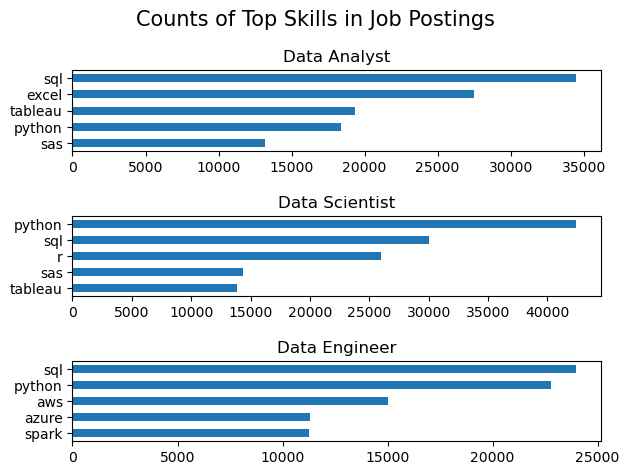

In [54]:
fig, ax = plt.subplots(3,1)

for i, job_tiitle in enumerate(top_roles):
    df_plot = df_US_skills_count[df_US_skills_count['job_title_short']==job_tiitle].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skills_count', ax=ax[i], title = job_tiitle)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=1.5)
plt.show()


In [69]:
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='Total_count')
df_job_title_count

df_skills_perc = pd.merge(df_US_skills_count, df_job_title_count, how='left')

df_skills_perc['skills_perc'] = (df_skills_perc['skills_count']/df_skills_perc['Total_count']) * 100

df_skills_perc

,job_skills,job_title_short,skills_count,Total_count,skills_perc
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


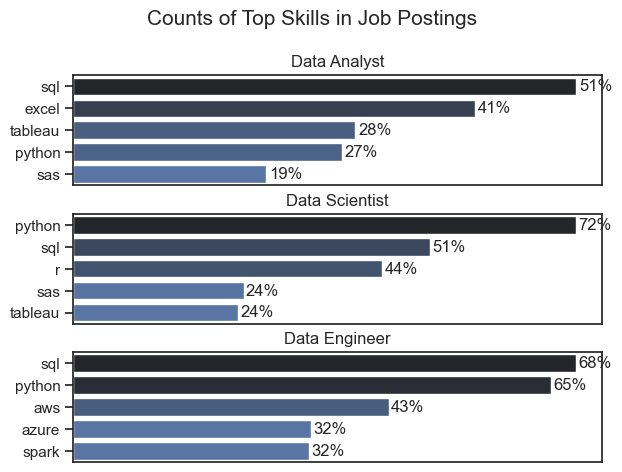

In [ ]:
sns.set_theme(style='ticks')
fig, ax = plt.subplots(3,1)

for i, job_tiitle in enumerate(top_roles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short']==job_tiitle].head(5)
    #df_plot.plot(kind='barh', x='job_skills', y='skills_perc', ax=ax[i], title = job_tiitle)
    sns.barplot(data=df_plot, ax=ax[i],y='job_skills',x='skills_perc', hue='skills_count', palette='dark:b_r')

    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_title(job_tiitle)
    ax[i].set_xlabel('')

    #ax[i].text()
    for n, v in enumerate(df_plot['skills_perc']):
        ax[i].text(v+0.3, n, f'{v:.0f}%', va='center')



fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=.5)
plt.show()